In [ ]:
import pandas as pd
import ast
from collections import Counter

nrc = pd.read_csv("NRC-Emotion-Lexicon-Wordlevel-v0.92.txt", 
                  sep='\t', names=["word", "emotion", "association"])
nrc = nrc[nrc['association'] == 1].drop(columns="association")

emotion_dict = {}
for word, emotion in nrc.values:
    emotion_dict.setdefault(word, []).append(emotion)

emotion_to_emoji = {
    'joy': '😊',
    'sadness': '😢',
    'anger': '😠',
    'fear': '😨',
    'surprise': '😲',
    'disgust': '🤢',
    'trust': '🤝',
    'anticipation': '🤔'
}

df = pd.read_csv("predictions_ordered.csv")

output = []

for _, row in df.iterrows():
    text = row['text']
    id_ = row['ID']
    try:
        keywords = ast.literal_eval(row['kws'])
    except:
        keywords = []

    emotion_counter = Counter()
    
    for kw in keywords:
        kw_lower = kw.lower()
        if kw_lower in emotion_dict:
            for emotion in emotion_dict[kw_lower]:
                emotion_counter[emotion] += 1

    if emotion_counter:
        top_emotion = emotion_counter.most_common(1)[0][0]
        emoji = emotion_to_emoji.get(top_emotion, '❓')
    else:
        top_emotion = 'neutral'
        emoji = '😐'

    output.append({
        'id': id_,
        'text': text,
        'emoji': emoji,
        'emotion': top_emotion
    })

output_df = pd.DataFrame(output)
output_df.to_csv("predictions_with_emojis.csv", index=False)


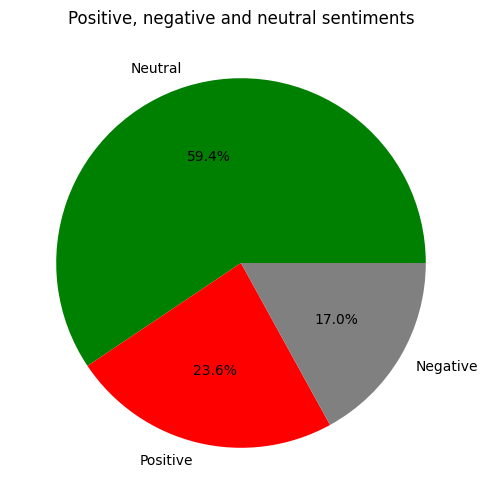

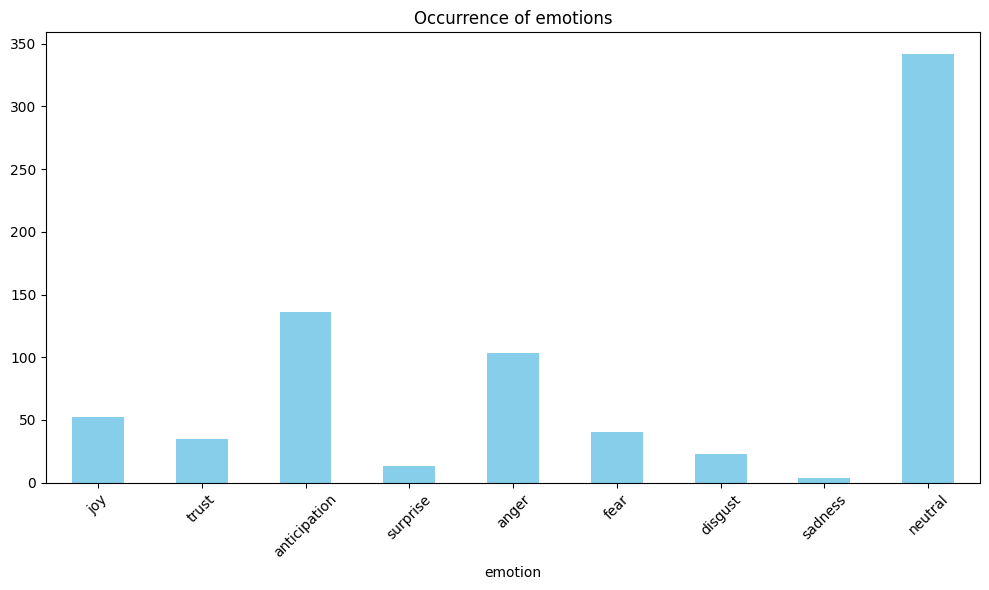

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("./emoji_results/predictions_with_emojis.csv")

positive_emotions = {'joy', 'trust', 'anticipation', 'surprise'}
negative_emotions = {'anger', 'fear', 'disgust', 'sadness'}

def classify_sentiment(emotion):
    if emotion in positive_emotions:
        return 'Positive'
    elif emotion in negative_emotions:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment_class'] = df['emotion'].apply(classify_sentiment)
sentiment_counts = df['sentiment_class'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=['green', 'red', 'gray'])
plt.title("Positive, negative and neutral sentiments")
plt.show()

emotion_counts = df['emotion'].value_counts()

emotion_order = ['joy', 'trust', 'anticipation', 'surprise', 'anger', 'fear', 'disgust', 'sadness', 'neutral', 'unknown']
emotion_counts = emotion_counts.reindex(emotion_order).dropna()

plt.figure(figsize=(10, 6))
emotion_counts.plot(kind='bar', color='skyblue')
plt.title("Occurrence of emotions")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

